In [1]:
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [5]:
data = data.sample(frac=0.1,random_state=1)
print(data.shape)
print(data.describe())

(2848, 31)
                Time           V1           V2           V3           V4  \
count    2848.000000  2848.000000  2848.000000  2848.000000  2848.000000   
mean    95248.251053     0.011750    -0.039351     0.018920     0.007964   
std     47644.314961     2.063431     1.844449     1.485247     1.410786   
min       128.000000   -40.470142   -39.818310   -17.474421    -4.459901   
25%     54624.250000    -0.887886    -0.620759    -0.854662    -0.783289   
50%     84653.000000     0.000171     0.041432     0.173164    -0.018219   
75%    140459.500000     1.323619     0.797554     1.058288     0.724953   
max    172719.000000     2.411499     9.770570     3.924953    11.427809   

                V5           V6           V7           V8           V9  ...  \
count  2848.000000  2848.000000  2848.000000  2848.000000  2848.000000  ...   
mean     -0.024247     0.030677     0.033694     0.029033     0.016412  ...   
std       1.509010     1.405890     1.314645     1.143569     1.068

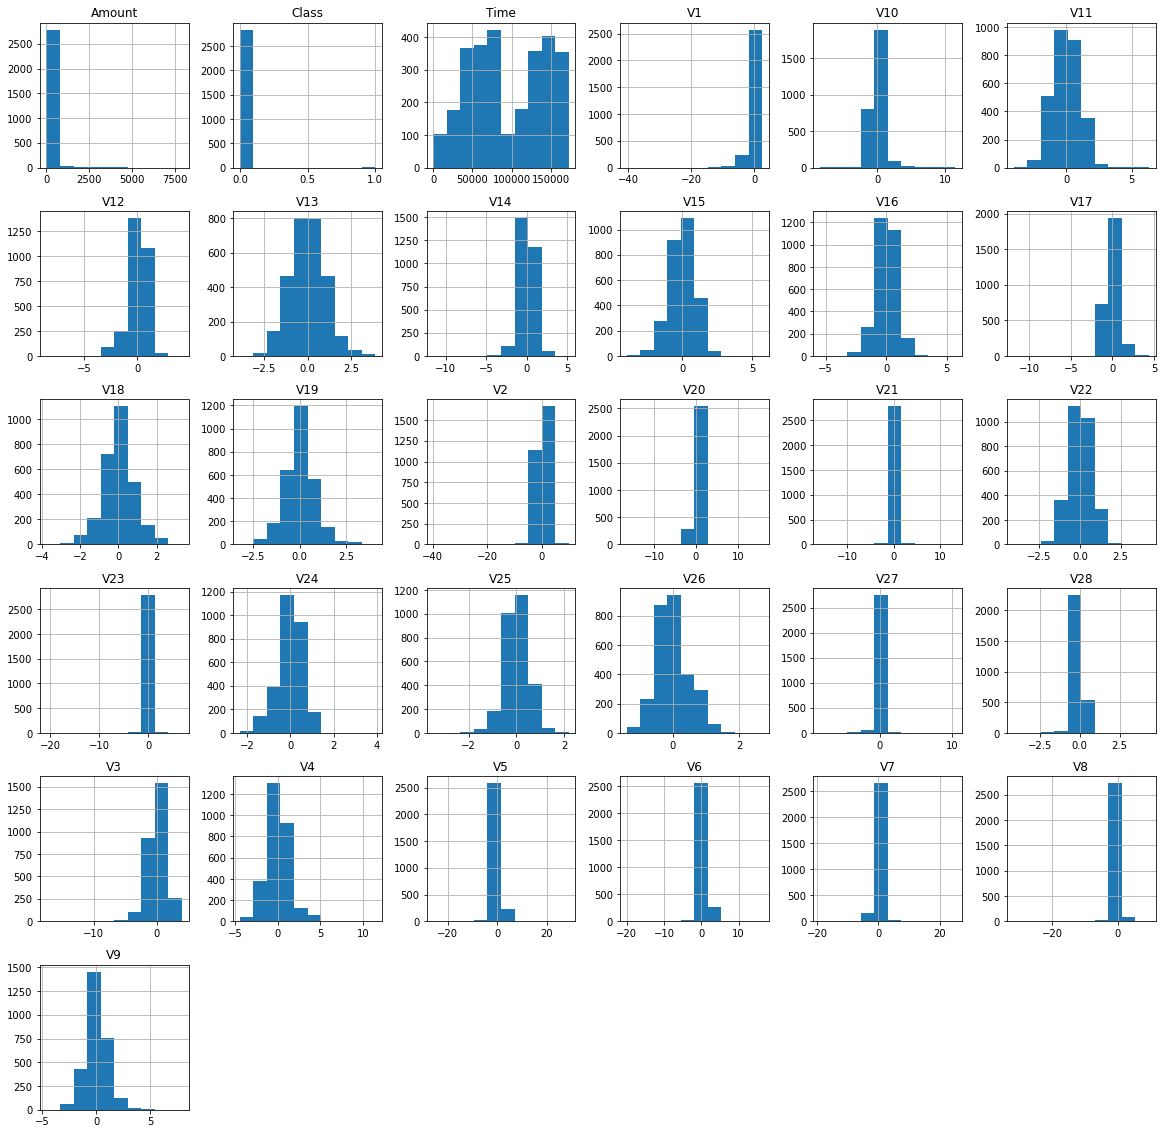

In [6]:
data.hist(figsize=(20,20))
plt.show()

In [8]:
Fraud = data[data['Class']==1]
Valid = data[data['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud cases {}'.format (len(Fraud)))
print('Valid cases {}'.format (len(Valid)))

0.0017587055926837848
Fraud cases 5
Valid cases 2843


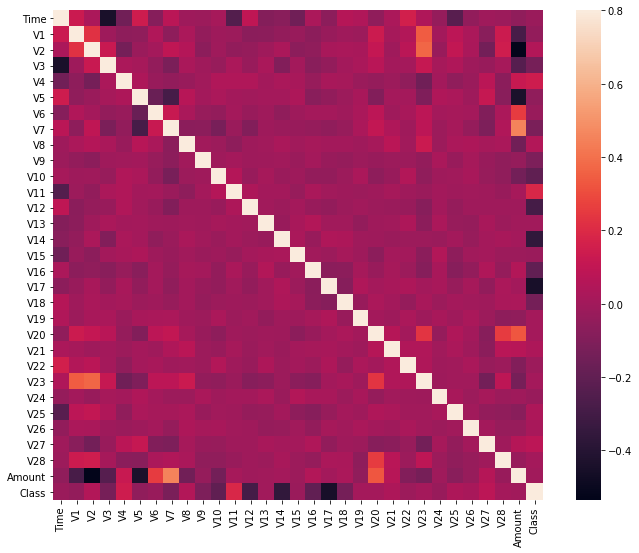

In [9]:
#Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat , vmax=0.8, square=True)
plt.show()

In [10]:
columns = data.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]

target = "Class"

x=data[columns]
y=data[target]

print(x.shape)
print(y.shape)

(2848, 30)
(2848,)


In [11]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state = 1
classifiers = {
    "IsolationForest":IsolationForest(max_samples= len(x),
                                      contamination=outlier_fraction,
                                     random_state=state),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)}

In [15]:
plt.figure(figsize=(9,7))
n_outliers=len(Fraud)

for i ,(clf_name,clf) in enumerate (classifiers.items()):
    if clf_name== "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_pred= clf.negative_outlier_factor_
    else:
        clf.fit(x)
        scores_pred=clf.decision_function(x)
        y_pred=clf.predict(x)
        
    y_pred[y_pred == 1]=0
    y_pred[y_pred == -1]=1
    
    n_errors = (y_pred != y).sum()
    
    print('{}.{}'.format(clf_name,n_errors))
    print(accuracy_score(y,y_pred))
    print(classification_report(y,y_pred))

IsolationForest.9
0.9968398876404494
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2843
           1       0.17      0.20      0.18         5

    accuracy                           1.00      2848
   macro avg       0.58      0.60      0.59      2848
weighted avg       1.00      1.00      1.00      2848

Local Outlier Factor.11
0.9961376404494382
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2843
           1       0.00      0.00      0.00         5

    accuracy                           1.00      2848
   macro avg       0.50      0.50      0.50      2848
weighted avg       1.00      1.00      1.00      2848



<Figure size 648x504 with 0 Axes>